<a href="https://colab.research.google.com/github/Sharukevo/HiRise/blob/main/Gully%20Monitoring%20and%20Topography%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [332]:
import requests
url = "https://raw.githubusercontent.com/Sharukevo/HiRise/main/Gully%20Monitoring%20and%20Topography%202.jpg"
im = Image.open(requests.get(url, stream=True).raw)
print(im.format, im.size, im.mode)

JPEG (3344, 3344) RGB


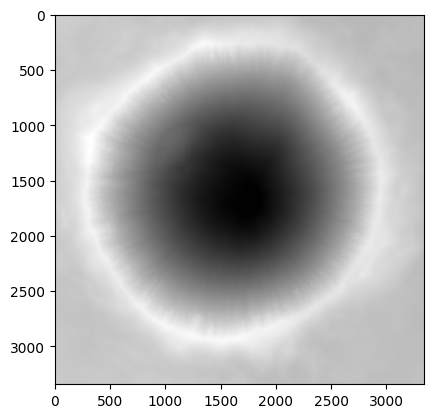

In [333]:
imgplot = plt.imshow(im)

In [334]:
imdata = np.array(im, dtype=int)

In [335]:
imdatax = np.linspace(start=1, stop=im.size[1],num=im.size[1])
print(imdatax)

[1.000e+00 2.000e+00 3.000e+00 ... 3.342e+03 3.343e+03 3.344e+03]


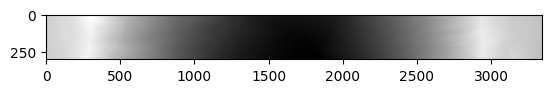

In [336]:

imdata = imdata[1300:1600:]
imgplot2 = plt.imshow(imdata)

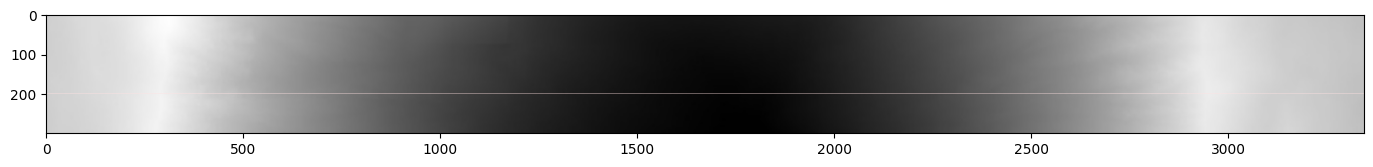

In [337]:
LineToExtract = 200
imdataADDLINE = imdata.copy()
imdataADDLINE[LineToExtract,:] = [255,225,225] 
plt.figure(figsize=(17, 3))
imgplot2 = plt.imshow(imdataADDLINE)

In [338]:
imdataRED = imdata[LineToExtract,:][:,0]
imdataGREEN = imdata[LineToExtract,:][:,1]
imdataBLUE = imdata[LineToExtract,:][:,2]
imdataAVG = (imdataRED+imdataGREEN+imdataBLUE)

In [339]:
print(imdataGREEN)

[208 208 208 ... 193 193 193]


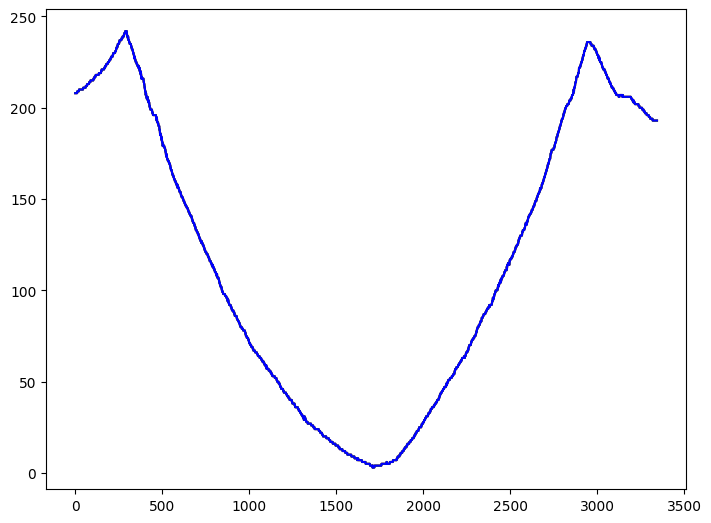

In [340]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataRED, color='r', label='Red')
ax.plot(imdatax,imdataGREEN, color='g', label='Green')
ax.plot(imdatax,imdataBLUE, color='b', label='Blue')
plt.show()

In [341]:
greenPeakPixels = imdataGREEN.argmax()
print(greenPeakPixels)

288


In [342]:
redPeakPixels = imdataRED.argmax()
print(redPeakPixels)

288


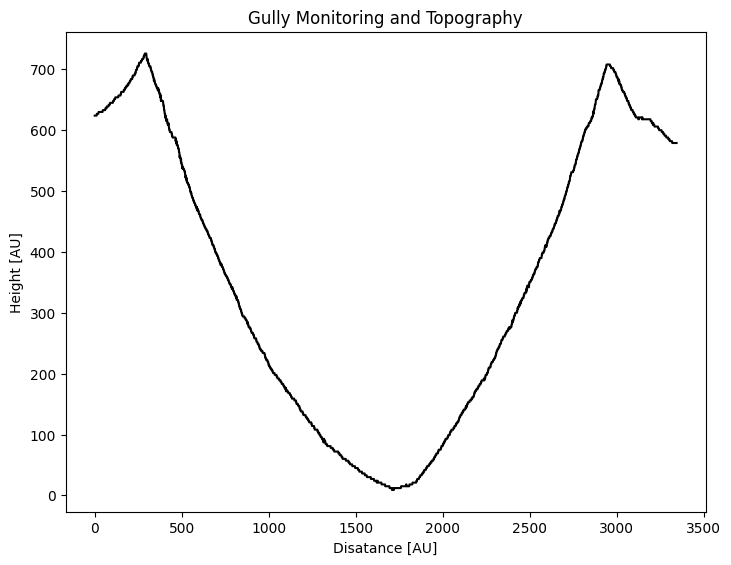

In [343]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdatax,imdataAVG, color='k', label='PretendData')

ax.set_xlabel('Disatance [AU]')
ax.set_ylabel('Height [AU]')
ax.set_title('Gully Monitoring and Topography')

plt.show()

In [344]:
from scipy.signal import find_peaks

In [345]:
peaks, _ = find_peaks(imdataAVG, height=100)


In [346]:
print(peaks)

[ 292  304  341  364  369  376  378  382  407  415  423  466  469  489
  496  505  523  527  587  591  726  790  814  878 1097 1101 2133 2236
 2380 2400 2431 2441 2445 2480 2487 2589 2592 2671 2864 2950 3009 3013
 3135 3146 3208]


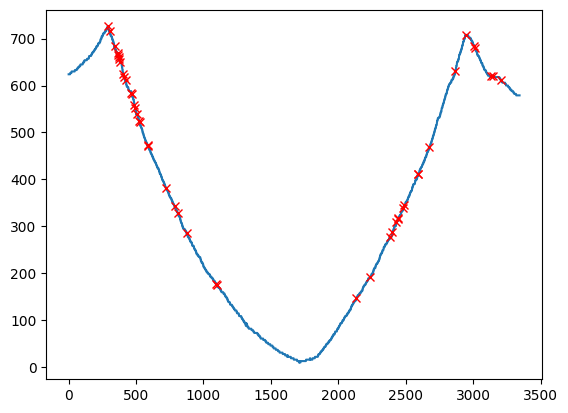

In [347]:
plt.plot(imdatax,imdataAVG)
plt.plot(peaks, imdataAVG[peaks], "xr")

plt.show()

In [348]:
print(peaks)

[ 292  304  341  364  369  376  378  382  407  415  423  466  469  489
  496  505  523  527  587  591  726  790  814  878 1097 1101 2133 2236
 2380 2400 2431 2441 2445 2480 2487 2589 2592 2671 2864 2950 3009 3013
 3135 3146 3208]


In [349]:
print(imdatax[peaks[0]])

293.0


In [350]:
from scipy.optimize import fsolve

In [351]:
def func(p):
    return [334*p[0]+p[1]-550,
            570*p[0]+p[1]-650]

params = fsolve(func, [1, 1])

print(params[0])
print(params[1])

0.4237288135593223
408.4745762711863


In [352]:
300*params[0]+params[1]

535.593220338983

In [353]:
550*params[0]+params[1]

641.5254237288136

In [354]:
imdataxInWavelength = imdatax*params[0]+params[1]

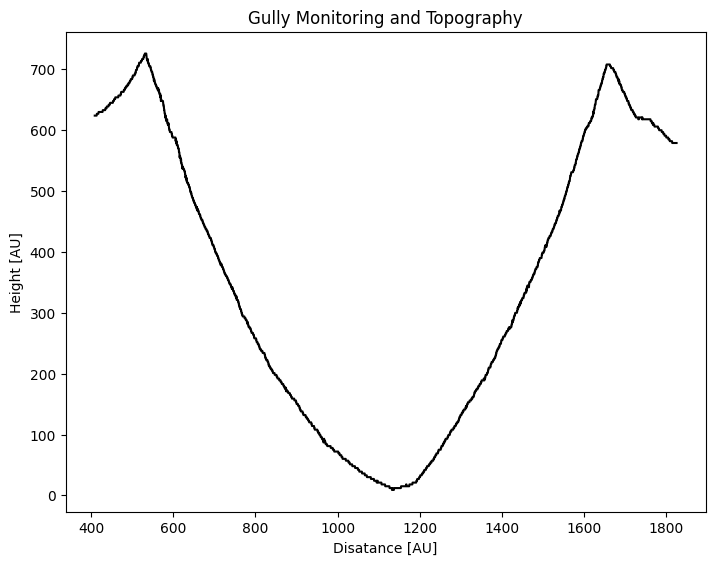

In [355]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(imdataxInWavelength,imdataAVG, color='k', label='PretendData')


ax.set_xlabel('Disatance [AU]')
ax.set_ylabel('Height [AU]')
ax.set_title('Gully Monitoring and Topography')
plt.show()